In [1]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import pandas as pd

# add precision
%precision 2

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 6)

%matplotlib inline 

/archive/Studies/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Pregnancy Data
data = pd.read_pickle('nsfg_data.pkl')

# CDC demographic - Body weight
cdc_data = pd.read_pickle('cdc_demographic_2008.pkl')

In [3]:
males = cdc_data[cdc_data.sex == 1 ]
females = cdc_data[cdc_data.sex == 2 ]

# successful pregnacies
live = data[data.outcome == 1]
# full term pregnacies
full_term = live[live.wksgest > 36]
# firstborns
firsts = live[live.birthord == 1] 
# subsequent births
others = live[live.birthord != 1]

In [4]:
#%% 7.1 Scatter plots

# choose a random subset of the data
indices = np.random.choice(cdc_data.index, size=5000, replace=False)
sample = cdc_data.iloc[indices]


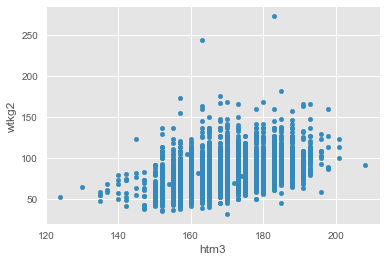

In [5]:
#%% Scatter plot
#pandas
sample.plot.scatter(x='htm3',y='wtkg2')

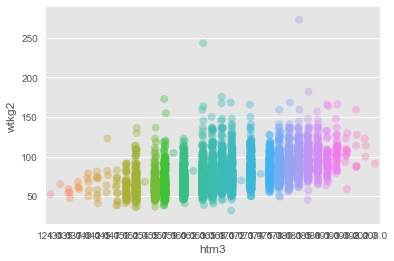

In [6]:
#%% Scatter plot - seaborn
sns.stripplot(x='htm3',y='wtkg2', data=sample, 
              jitter=True, edgecolor='none', 
              alpha=.40, size=8)

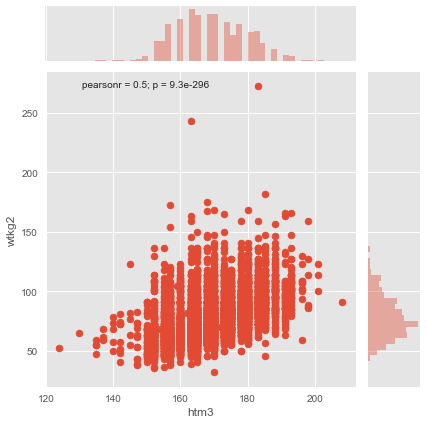

In [7]:
sns.jointplot(x='htm3',y='wtkg2', data=sample, dropna=True)

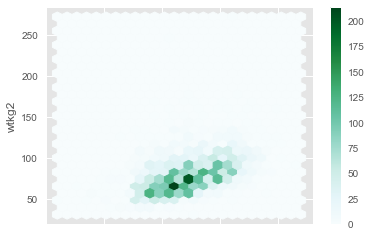

In [8]:
#%% Hexbin plot  - pandas
sample.plot.hexbin(x='htm3',y='wtkg2', gridsize=25)

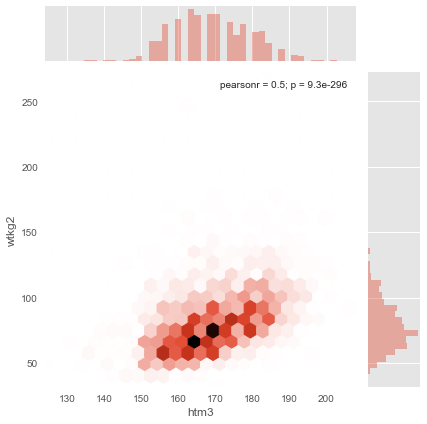

In [9]:
##%% Hexbin plot  - seaborn
sns.jointplot(x='htm3',y='wtkg2', 
              kind='hex', data=sample,gridsize=25)


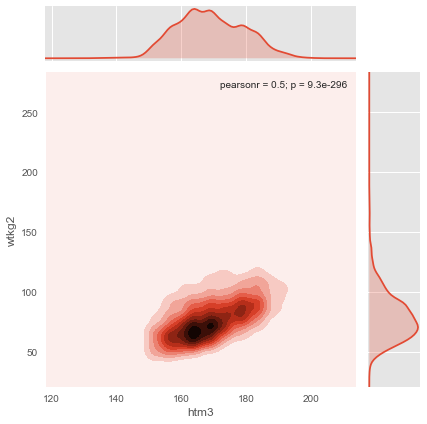

In [10]:
#%% joint kde plot
sns.jointplot(x='htm3',y='wtkg2', kind='kde', data=sample)


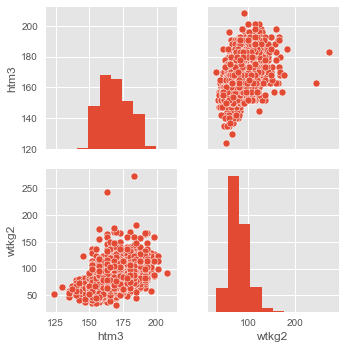

In [11]:
#%% pair plot
sample_noNans = sample.dropna()
sns.pairplot(sample_noNans, 
             x_vars=['htm3','wtkg2'],y_vars=['htm3','wtkg2'])

In [12]:
#%% 7.2 Characterizing relationships

# bin one variable and plot percentiles of the other.
data = cdc_data.dropna(subset=['htm3','wtkg2'])
bins =np.arange(135, 210, 5)
height_index = np.digitize(data.htm3, bins)
groups = data.groupby(height_index)

for i, group in groups:
    print(i, len(group))

0 305
1 228
2 477
3 2162
4 18759
5 45761
6 70610
7 72138
8 61725
9 49938
10 43555
11 20077
12 7784
13 1777
14 405
15 131
